# Import and Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
Path.ls = lambda x: list(x.iterdir())
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re, os
from tqdm import tqdm

# Label

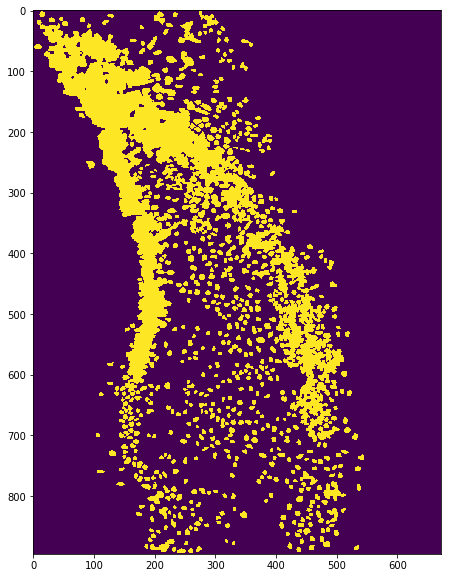

In [3]:
image = cv.imread("raw/441.1_Z0063_R_label.tif", cv.COLOR_BGR2GRAY)
    
plt.figure(figsize = (10,10))
plt.imshow(image); plt.show()

contours, hierarchy = cv.findContours(
    image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

contours = [np.squeeze(contour,axis=1) for contour in contours]

In [4]:
cluster = contours[np.argmax([len(contour) for contour in contours])]
num_cells = cv.contourArea(cluster)//91.94; num_cells

549.0

# Evenly Distribute

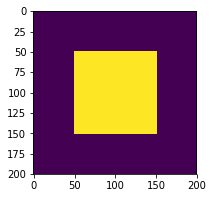

In [5]:
#https://stackoverflow.com/questions/19222343/filling-contours-with-opencv-python
cs = np.array( [ [50,50], [50,150], [150, 150], [150,50] ] )
img = np.zeros( (200,200) ) # create a single channel 200x200 pixel black image 
cv.fillPoly(img, pts =[cs], color=(255,255,255))
plt.figure(figsize = (3,3))
plt.imshow(img); plt.show()

# Randomly Sample Points

In [6]:
centroids = np.zeros(image.shape, np.uint8)
n=0
x,y,w,h = cv.boundingRect(cluster)
while n < num_cells:
    
    center = np.random.randint(low = x, high = x+w), np.random.randint(low = y, high = y+h)
    if cv.pointPolygonTest(
        contour = cluster, pt = center, measureDist = False) != 1:
        continue
        
    cv.circle(img=centroids,
              center=center,
              radius=0,
              color=255,
              thickness=1)
    n+=1

In [7]:
cv.drawContours(image=centroids,
                contours=[cluster],
                contourIdx=-1,  # negative value means draw all contours
                color=(50,50,50),
                thickness=1,
                lineType = cv.LINE_AA);

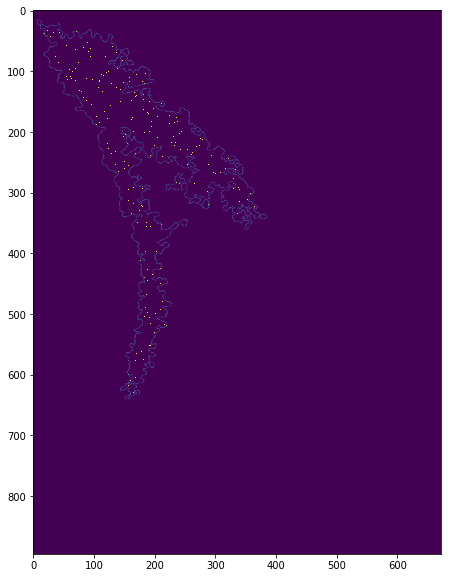

In [8]:
plt.figure(figsize = (10,10))
plt.imshow(centroids); plt.show()